In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pycaret
from pycaret.regression import *

In [2]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [3]:
df = pd.read_csv('Concrete_Data.csv', header=None)
df.columns =['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
             'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [345]:
#s = setup(data = df, target = 'Concrete compressive strength', session_id=123, silent=True) 

In [346]:
#best = compare_models(sort='MSE')

In [347]:
#ridge = create_model('ridge')

In [348]:
#print(ridge)

In [349]:
#tuned_ridge = tune_model(ridge)

In [350]:
#print(tuned_ridge)

In [351]:
df.isna().sum() # no missing values in the dataframe

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

array([[<AxesSubplot: title={'center': 'Cement '}>,
        <AxesSubplot: title={'center': 'Blast Furnace Slag'}>,
        <AxesSubplot: title={'center': 'Fly Ash'}>],
       [<AxesSubplot: title={'center': 'Water'}>,
        <AxesSubplot: title={'center': 'Superplasticizer'}>,
        <AxesSubplot: title={'center': 'Coarse Aggregate'}>],
       [<AxesSubplot: title={'center': 'Fine Aggregate'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Concrete compressive strength'}>]],
      dtype=object)

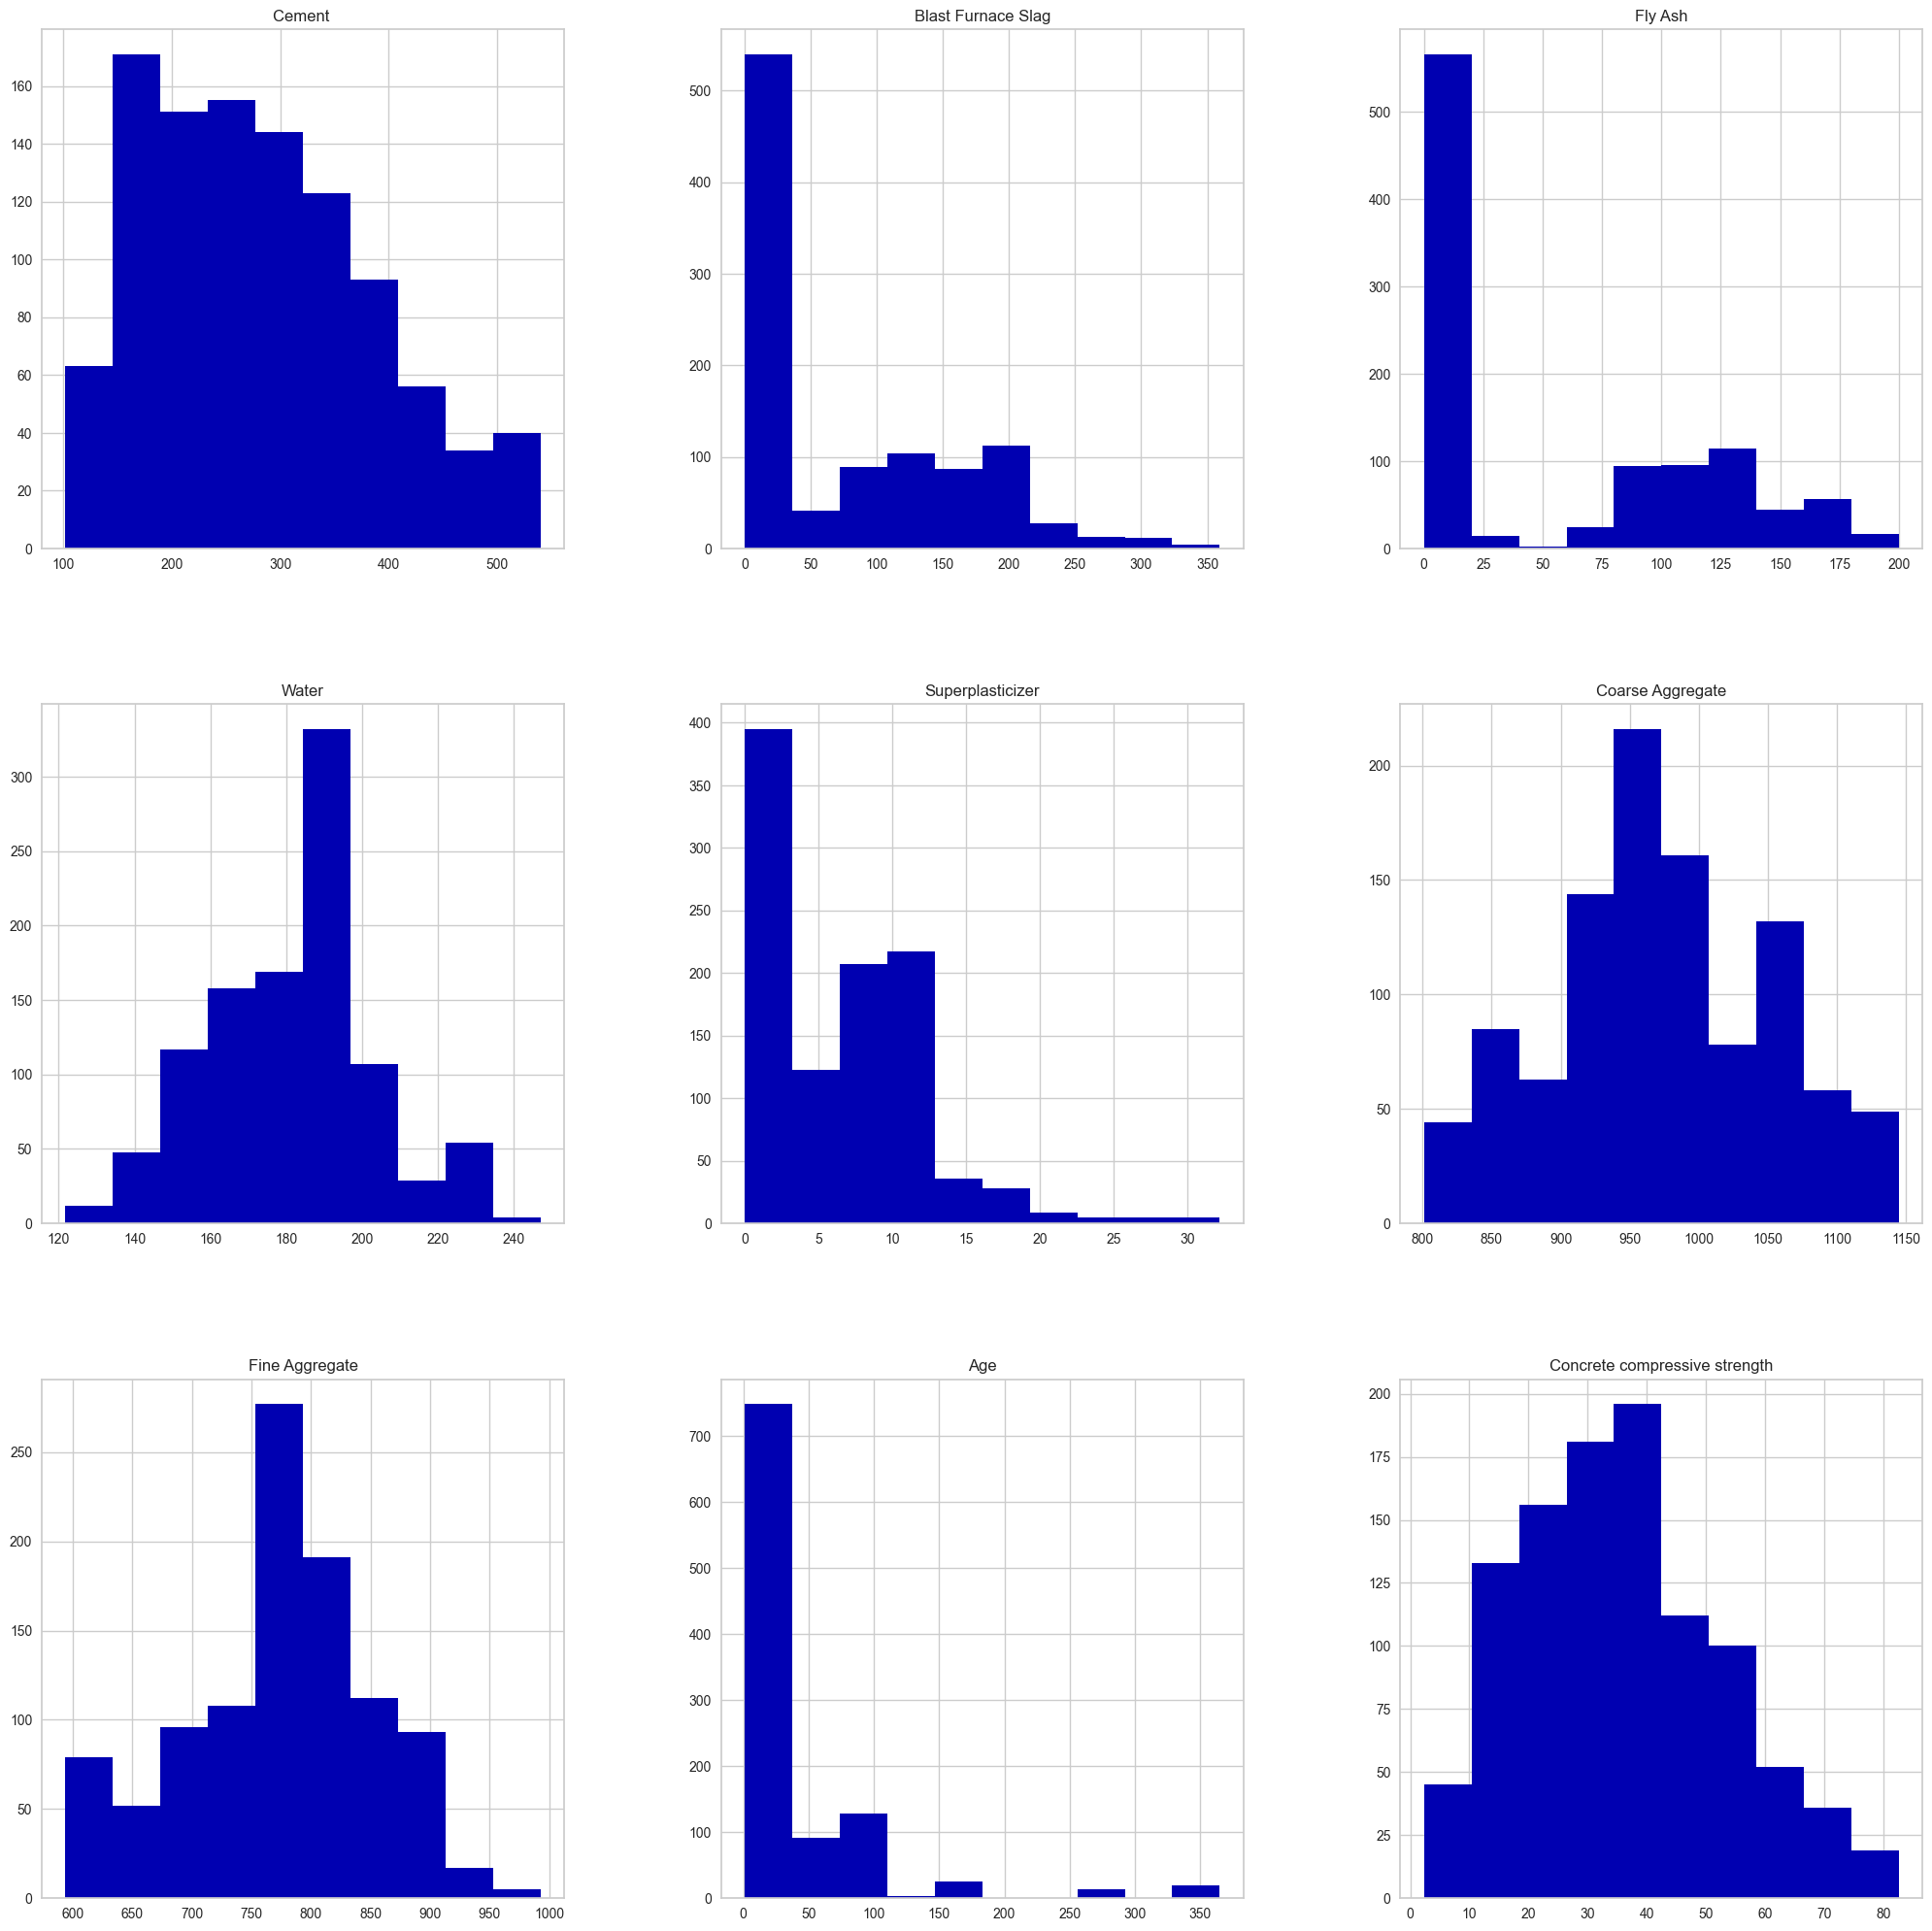

In [352]:
# visualizing the dataframe
df.hist(figsize=(25,25))

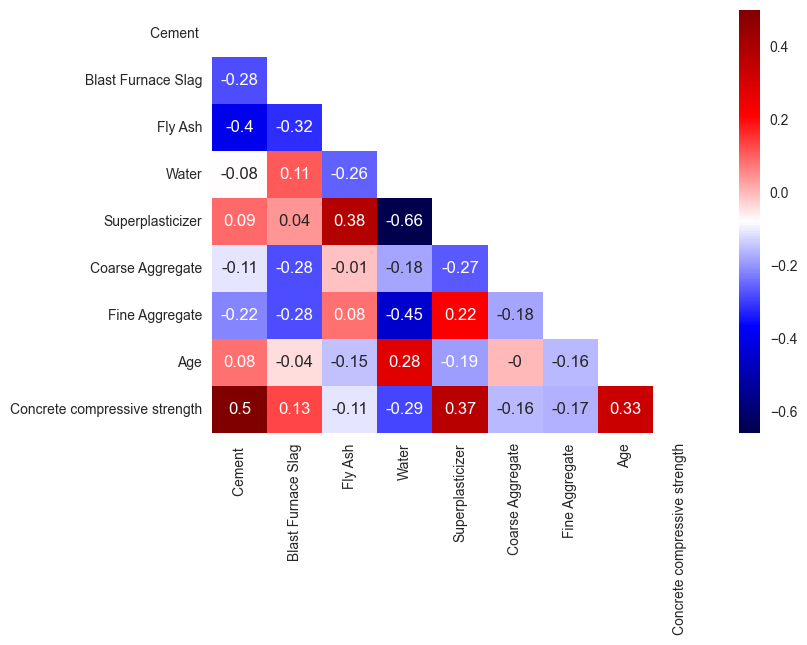

In [353]:
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap,mask=mask)
plt.savefig("visualizations/correlation_matrix_.png",bbox_inches='tight')

In [4]:
# Splitting the data into train and test data

X = df[['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
        'Coarse Aggregate', 'Fine Aggregate', 'Age']]
y = df['Concrete compressive strength'] # the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(721,)
(309,)


The **Min-Max Scaling** uses the minimum and maximum value of a feature to rescale values within a range typically between 0 to 1 or -1 to 1. The shape of the distribution doesn’t change. 

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

--------------------------
The **Mean Squared Error (MSE)** is a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{2}^{2}.
$$

The **Mean Absolute Error (MAE)** is a risk metric corresponding to the expected value of the absolute error loss and it is defined as 

$$
MAE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{1}.
$$

The **Mean Absolute Percentage Error (MAPE)** expresses the accuracy as a ratio defined by the formula

$$
MAPE = \frac{1}{N} \sum_{i=1}^{N} |\frac{y(i)-\hat{y}(i)}{y(i)}| .
$$

---------------------
# Ordinary Least Squares regression (OLS) 

In [356]:
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_pred = ols.predict(X_train_scaled)

In [9]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))

In [358]:
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, y_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, y_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, y_pred))

The model performance for training set
--------------------------------------
Mean squared error (MSE): 107.24
Mean absolute error (MAE): 8.18
Mean Absolute Percentage Error (MAPE): 0.31


In [359]:
# model evaluation for testing set
y_test_pred = regr.predict(X_test_scaled)

print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

The model performance for testing set
--------------------------------------
Mean squared error (MSE): 109.75
Mean absolute error (MAE): 8.30
Mean Absolute Percentage Error (MAPE): 0.32


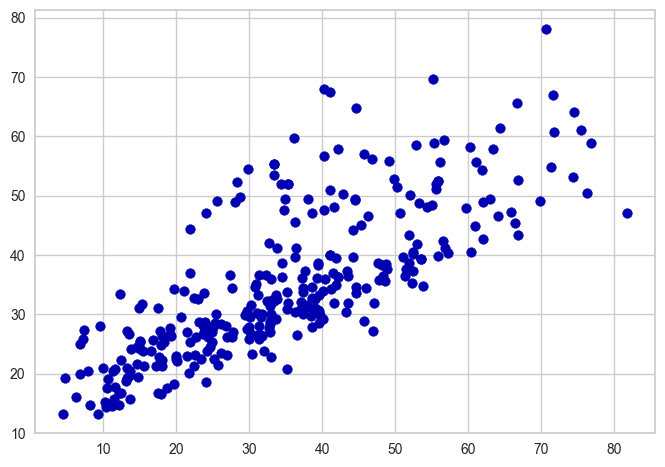

In [360]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_pred)
plt.show()

# Ridge

In [361]:
alpha = 0.01
ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
yridge = ridge.predict(X_train_scaled)

In [362]:
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, yridge))

The model performance for training set
--------------------------------------
Mean squared error (MSE): 107.24
Mean absolute error (MAE): 8.18
Mean Absolute Percentage Error (MAPE): 0.31


In [363]:
# model evaluation for testing set
y_test_pred = ridge.predict(X_test_scaled)

print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

The model performance for testing set
--------------------------------------
Mean squared error (MSE): 109.72
Mean absolute error (MAE): 8.30
Mean Absolute Percentage Error (MAPE): 0.32


In [14]:
nalphas=10
alphas = np.logspace(-3, 5, nalphas)

In [15]:
mse_train  = []
mse_test = []
mae_train = []
mae_test = []
mape_train = []
mape_test = []

for alpha in alphas:
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    yridge_train = ridge.predict(X_train_scaled)
    yridge_test = ridge.predict(X_test_scaled)
    
    #Results
    mse_train.append(mean_squared_error(y_train, yridge_train))
    mse_test.append(mean_squared_error(y_test, yridge_test))
    mae_train.append(mean_absolute_error(y_train, yridge_train))
    mae_test.append(mean_absolute_error(y_test, yridge_test))
    mape_train.append(MAPE(y_train, yridge_train))
    mape_test.append(MAPE(y_test, yridge_test))

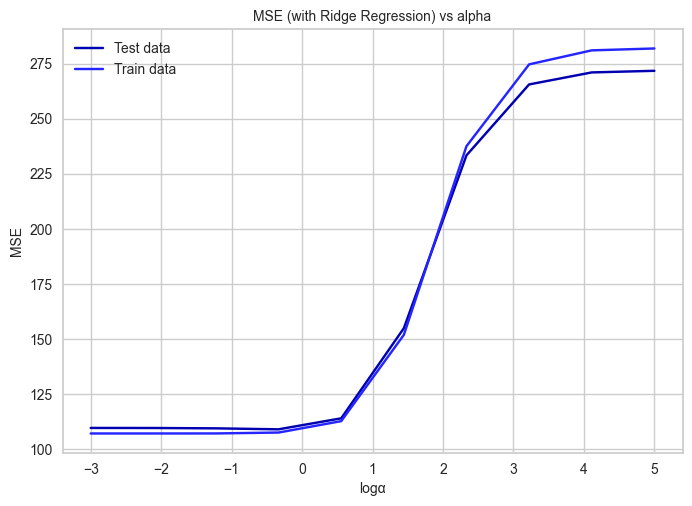

In [16]:
plt.plot(np.log10(alphas), mse_test,  label = 'Test data')
plt.plot(np.log10(alphas), mse_train,  label = 'Train data')
plt.xlabel('logα',size=10)
plt.ylabel('MSE',size=10)
plt.legend()
plt.title('MSE (with Ridge Regression) vs alpha', fontsize = 10)
plt.show()

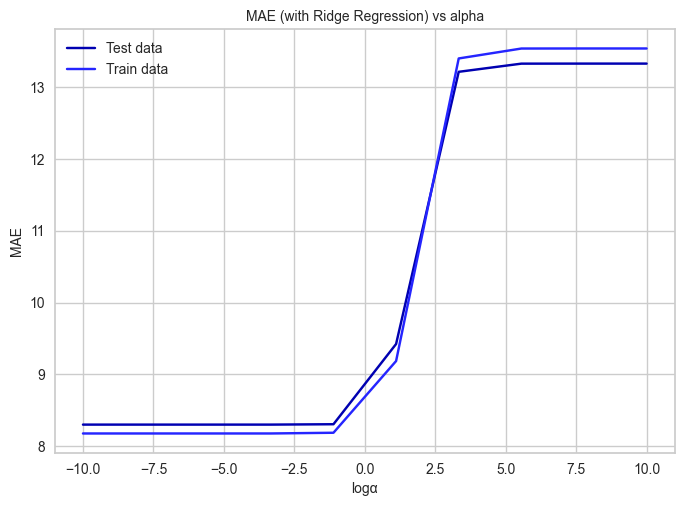

In [389]:
plt.plot(np.log10(alphas), mae_test,  label = 'Test data')
plt.plot(np.log10(alphas), mae_train,  label = 'Train data')
plt.xlabel('logα',size=10)
plt.ylabel('MAE',size=10)
plt.legend()
plt.title('MAE (with Ridge Regression) vs alpha', fontsize = 10)
plt.show()

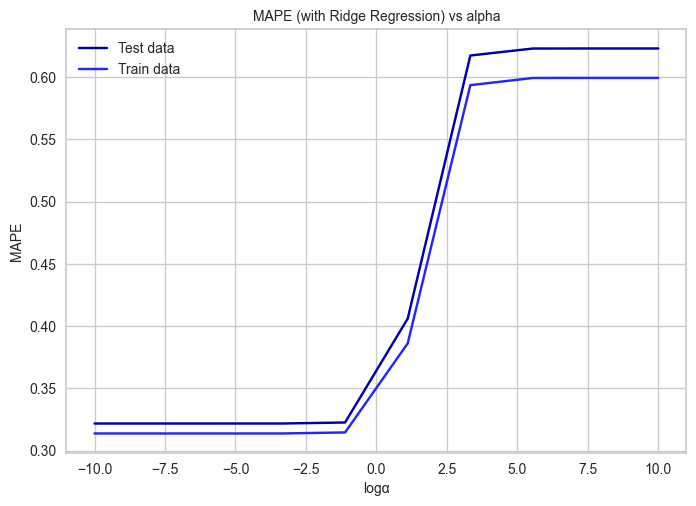

In [392]:
plt.plot(np.log10(alphas), mape_test,  label = 'Test data')
plt.plot(np.log10(alphas), mape_train,  label = 'Train data')
plt.xlabel('logα',size=10)
plt.ylabel('MAPE',size=10)
plt.legend()
plt.title('MAPE (with Ridge Regression) vs alpha', fontsize = 10)
plt.show()

In [295]:
df = pd.DataFrame()
mse  = []
mae = []
mape = []
alphas = np.arange(0.1, 5000, 10).tolist()
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train_scaled, y_train)
    pred = ridge.predict(X_test_scaled)  
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    mape.append(MAPE(y_test, pred))
    alphas = {'alpha':a, 'mse': mse, 'mae':mae, 'mape':mape} 
    alphas = pd.DataFrame(alphas)
    df = pd.concat([df, alphas])

In [296]:
df = df.sort_values(by=['mape'])
df

,alpha,mse,mae,mape
0,0.1,109.462934,8.305465,0.322924
0,2110.1,109.462934,8.305465,0.322924
0,550.1,109.462934,8.305465,0.322924
0,4200.1,109.462934,8.305465,0.322924
0,4840.1,109.462934,8.305465,0.322924
...,...,...,...,...
497,4980.1,269.650121,13.281107,0.620558
497,4970.1,269.650121,13.281107,0.620558
498,4980.1,269.654416,13.281207,0.620563
498,4990.1,269.654416,13.281207,0.620563


In [297]:
clf = Ridge()

X, y, w = make_regression(
    n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5
)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Coefficient error as a function of the regularization")
plt.axis("tight")

plt.show()

NameError: name 'make_regression' is not defined

# LASSO